In [1]:
import numpy as np
import xarray as xr

import seaborn as sns
sns.set_theme(palette="colorblind")

## MOZART Grid

Use hourly for everything

In [11]:
# import a MOZART output file and determine the grid
# QUESTION: how to decode time coordinate?
# QUESTION: are lon/lat values grid centers? 9/10 it is...
ds = xr.open_dataset("./1_transport/intermediates/MOZART/output/BasisFnsUpdated/201409/BasisFnsUpdated.mz4.h1.2014-09-02-00000.nc", decode_times=False)
ds

<xarray.Dataset>
Dimensions:           (ilev: 57, lev: 56, lat: 96, lon: 144, time: 30)
Coordinates:
  * ilev              (ilev) float32 1.651 2.085 2.62 ... 970.0 985.0 1e+03
  * lev               (lev) float32 1.868 2.353 2.948 ... 962.5 977.5 992.5
  * lat               (lat) float32 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon               (lon) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * time              (time) float64 7.358e+05 7.358e+05 ... 7.359e+05 7.359e+05
Data variables: (12/47)
    P0                float32 ...
    ntrm              int32 ...
    ntrn              int32 ...
    ntrk              int32 ...
    ndbase            int32 ...
    nsbase            int32 ...
    ...                ...
    CO2_T17_13:30_LT  (time, lev, lat, lon) float32 ...
    CO2_T18_13:30_LT  (time, lev, lat, lon) float32 ...
    CO2_T19_13:30_LT  (time, lev, lat, lon) float32 ...
    CO2_T20_13:30_LT  (time, lev, lat, lon) float32 ...
    CO2_T21_13:30_LT  (time, lev, lat, lon) float32 ...
    CO2_T22_13:30_LT  (time, lev, lat, lon) float32 ...
Attributes:
    Conventions:  NCAR-CSM
    case:         BasisFnsUpdated                 
    title:        CO2                                                        ...

In [13]:
# averages over start to end of day; just transform by -1 day and convert to datetime
ds.date

<xarray.DataArray 'date' (time: 30)>
array([20140902, 20140903, 20140904, 20140905, 20140906, 20140907, 20140908,
       20140909, 20140910, 20140911, 20140912, 20140913, 20140914, 20140915,
       20140916, 20140917, 20140918, 20140919, 20140920, 20140921, 20140922,
       20140923, 20140924, 20140925, 20140926, 20140927, 20140928, 20140929,
       20140930, 20141001], dtype=int32)
Coordinates:
  * time     (time) float64 7.358e+05 7.358e+05 ... 7.359e+05 7.359e+05
Attributes:
    long_name:  current date as 6 digit integer (YYMMDD)

In [14]:
da_base = ds["CO2_13:30_LT"]
print(da_base.lon)
print(da_base.lat)

<xarray.DataArray 'lon' (lon: 144)>
array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,  22.5,
        25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,  45. ,  47.5,
        50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,  67.5,  70. ,  72.5,
        75. ,  77.5,  80. ,  82.5,  85. ,  87.5,  90. ,  92.5,  95. ,  97.5,
       100. , 102.5, 105. , 107.5, 110. , 112.5, 115. , 117.5, 120. , 122.5,
       125. , 127.5, 130. , 132.5, 135. , 137.5, 140. , 142.5, 145. , 147.5,
       150. , 152.5, 155. , 157.5, 160. , 162.5, 165. , 167.5, 170. , 172.5,
       175. , 177.5, 180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5,
       200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. 

In [15]:
print(da_base.lat.values[45] - da_base.lat.values[44])
print(da_base.lat.values[12] - da_base.lat.values[11])
print(da_base.lat.values[78] - da_base.lat.values[77])

1.8947368
1.8947372
1.8947372


## GEOS base run exploration

In [12]:
# QUESTION: where are the different runs? (i.e., not just one run per day right?)
# files reference daily or hourly averages (see time dimension)
# both are used in matching

# in base run folder, but we only need to compare base runs at first

# get pressure edge from corresponding LevelEdgeDiags files
ds = xr.open_dataset("1_transport/intermediates/GEOS_Chem/runs/run.v12.3.2.base/output/GEOSChem.SpeciesConcDaily.201410.nc4")
ds

<xarray.Dataset>
Dimensions:          (time: 31, bnds: 2, lon: 144, lat: 91, lev: 47)
Coordinates:
  * time             (time) datetime64[ns] 2014-10-01T12:00:00 ... 2014-10-31...
  * lon              (lon) float64 -180.0 -177.5 -175.0 ... 172.5 175.0 177.5
  * lat              (lat) float64 -89.5 -88.0 -86.0 -84.0 ... 86.0 88.0 89.5
  * lev              (lev) float64 0.9925 0.9775 0.9625 ... 0.0001387 3.8e-05
Dimensions without coordinates: bnds
Data variables:
    time_bnds        (time, bnds) datetime64[ns] ...
    lev_bnds         (lev, bnds) float64 ...
    AREA             (lat, lon) float32 ...
    SpeciesConc_CO2  (time, lev, lat, lon) float32 ...
Attributes:
    CDI:                             Climate Data Interface version ?? (http:...
    Conventions:                     CF-1.6
    history:                         Fri Nov 20 16:12:30 2020: cdo -v -splity...
    title:                           GEOS-Chem diagnostic collection: Species...
    format:                          CFIO
    conventions:                     COARDS
    reference:                       www.geos-chem.org; wiki.geos-chem.org
    contact:                         GEOS-Chem Support Team (geos-chem-suppor...
    simulation_start_date_and_time:  2014-09-01 00:00:00z
    simulation_end_date_and_time:    2017-04-01 00:00:00z
    frequency:                       day
    CDO:                             Climate Data Operators version 1.9.3 (ht...

## MOZART base run exploration

In [16]:
with xr.open_dataset("./1_transport/intermediates/MOZART/output/BasisFnsUpdated/201409/BasisFnsUpdated.mz4.h1.2014-09-02-00000.nc", decode_times=False) as ds:
    ilev = ds.ilev
    da_base = ds["CO2_13:30_LT"]

da_base

<xarray.DataArray 'CO2_13:30_LT' (time: 30, lev: 56, lat: 96, lon: 144)>
[23224320 values with dtype=float32]
Coordinates:
  * lev      (lev) float32 1.868 2.353 2.948 3.677 ... 947.5 962.5 977.5 992.5
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) float64 7.358e+05 7.358e+05 ... 7.359e+05 7.359e+05
Attributes:
    units:    VMR

In [17]:
ilev

<xarray.DataArray 'ilev' (ilev: 57)>
array([   1.65079 ,    2.08497 ,    2.620211,    3.276431,    4.076571,
          5.046801,    6.216801,    7.619842,    9.292941,   11.2769  ,
         13.6434  ,   16.4571  ,   19.7916  ,   23.73041 ,   28.36781 ,
         33.81001 ,   40.17541 ,   47.64391 ,   56.38791 ,   66.60341 ,
         78.512314,   92.36572 ,  108.663   ,  127.837006,  150.39299 ,
        176.93001 ,  208.15204 ,  244.87505 ,  288.08307 ,  337.5001  ,
        375.0001  ,  412.5001  ,  450.00012 ,  487.5001  ,  525.0001  ,
        562.5001  ,  600.0002  ,  637.5002  ,  675.0001  ,  700.0001  ,
        725.00006 ,  750.0001  ,  774.9998  ,  800.00024 ,  820.0002  ,
        835.0001  ,  850.0001  ,  865.      ,  879.9999  ,  895.      ,
        909.9998  ,  925.      ,  940.0001  ,  954.9998  ,  969.99976 ,
        985.      , 1000.      ], dtype=float32)
Coordinates:
  * ilev     (ilev) float32 1.651 2.085 2.62 3.276 ... 955.0 970.0 985.0 1e+03
Attributes:
    long_name:  hybrid level at layer interface (1000*(A+B))
    units:      hybrid_sigma_pressure
    positive:   down
    A_var:      hyam
    B_var:      hybm
    P0_var:     P0
    PS_var:     PS
    bounds:     ilev

In [3]:
# lev is atmospheric pressure, so surface is last entry
da_base.lev

<xarray.DataArray 'lev' (lev: 56)>
array([  1.86788 ,   2.35259 ,   2.948321,   3.676501,   4.561686,   5.631801,
         6.918321,   8.456392,  10.284921,  12.46015 ,  15.05025 ,  18.12435 ,
        21.761005,  26.049109,  31.08891 ,  36.99271 ,  43.90966 ,  52.01591 ,
        61.495663,  72.55786 ,  85.43901 , 100.51436 , 118.25    , 139.115   ,
       163.6615  , 192.54102 , 226.51353 , 266.47906 , 312.79156 , 356.25012 ,
       393.7501  , 431.2501  , 468.7501  , 506.2501  , 543.7501  , 581.2501  ,
       618.7502  , 656.2501  , 687.50006 , 712.5001  , 737.50006 , 762.5     ,
       787.5     , 810.0002  , 827.5002  , 842.5001  , 857.50006 , 872.5     ,
       887.5     , 902.4999  , 917.49994 , 932.50006 , 947.49994 , 962.4998  ,
       977.49994 , 992.5     ], dtype=float32)
Coordinates:
  * lev      (lev) float32 1.868 2.353 2.948 3.677 ... 947.5 962.5 977.5 992.5
Attributes:
    long_name:  hybrid level at layer midpoints (1000*(A+B))
    units:      hybrid_sigma_pressure
    positive:   down
    A_var:      hyam
    B_var:      hybm
    P0_var:     P0
    PS_var:     PS
    bounds:     ilev

In [4]:
# need to area weight, calculate from the grid (or look in other files)
da_surface_mean_timeseries = da_base.sel(lev=da_base.lev[-1]).mean(dim=["lon", "lat"])
da_surface_mean_timeseries

<xarray.DataArray 'CO2_13:30_LT' (time: 30)>
array([0.00039337, 0.00039337, 0.00039336, 0.00039333, 0.00039335,
       0.00039335, 0.00039334, 0.00039338, 0.00039347, 0.00039353,
       0.00039354, 0.00039359, 0.00039359, 0.00039364, 0.00039368,
       0.00039373, 0.00039382, 0.00039394, 0.00039401, 0.0003941 ,
       0.00039416, 0.0003942 , 0.00039423, 0.00039431, 0.00039442,
       0.00039455, 0.00039468, 0.00039484, 0.00039498, 0.000395  ],
      dtype=float32)
Coordinates:
    lev      float32 992.5
  * time     (time) float64 7.358e+05 7.358e+05 ... 7.359e+05 7.359e+05

<AxesSubplot:xlabel='time'>

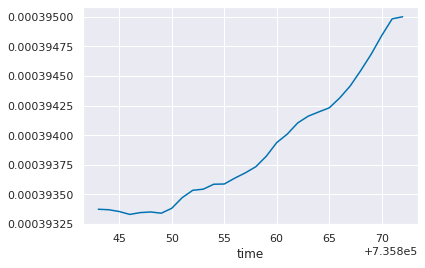

In [5]:
sns.lineplot(x=da_surface_mean_timeseries.time, y=da_surface_mean_timeseries.values)

inputs

annual aggregate flux 
(inputs could actually be misspecified so check model's diagnostics)
in output/h0's we have SRF_EMIS_avrg (kg/m^2/s)
    - compute into kg by multiply through correct units
    - time series of global co2 emmitted mass

in GEOS_Chem these variables are in HEMCO_diagnostics
 - Emis_Co2 (need sum of levs)


outputs

merge first h1 (daily) file into one large dataset that covers the study period

focus on monthly analysis

plot maps of vertical average for the very first timestep (hourly version)
 - create difference plot

1. surface level
    - zonal averaging (hovmoller, two plots or difference)
        - don't need to do area weighting (fixed lat)
    - global average (time series, two lines on the same plot)

2. vertical averages
    - zonal averages (hovmoller)
    - global (time series)
        - should be same between mozart and geos chem


do this before moving on to a couple other sensitivity runs


report
- MVP is a pdf with each of these plots with a breif discussion of what the plot is (not necessarily the math)
- next level would be interpretation
- best would be to have some equations
mike estimates full time work would take 3 weeks to get inversions

For vertical averaging, see profile.pdf
equations 1 & 2